# 1. Setting up all necessary libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import normalize, minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor
from catboost import Pool 
import torch

In [53]:
sns.set_style('whitegrid')

In [54]:
data_train = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')

In [55]:
data_train.shape

(1460, 81)

In [56]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [57]:
data_train = data_train.drop('Id', axis=1)

### Let's begin our journey to highest possible raiting through some feature extraction and engineering

In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Let's see the distribution of all numerical data

In [60]:
df_cat = data_train.select_dtypes(include = ['object'])

In [61]:
df_num = data_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


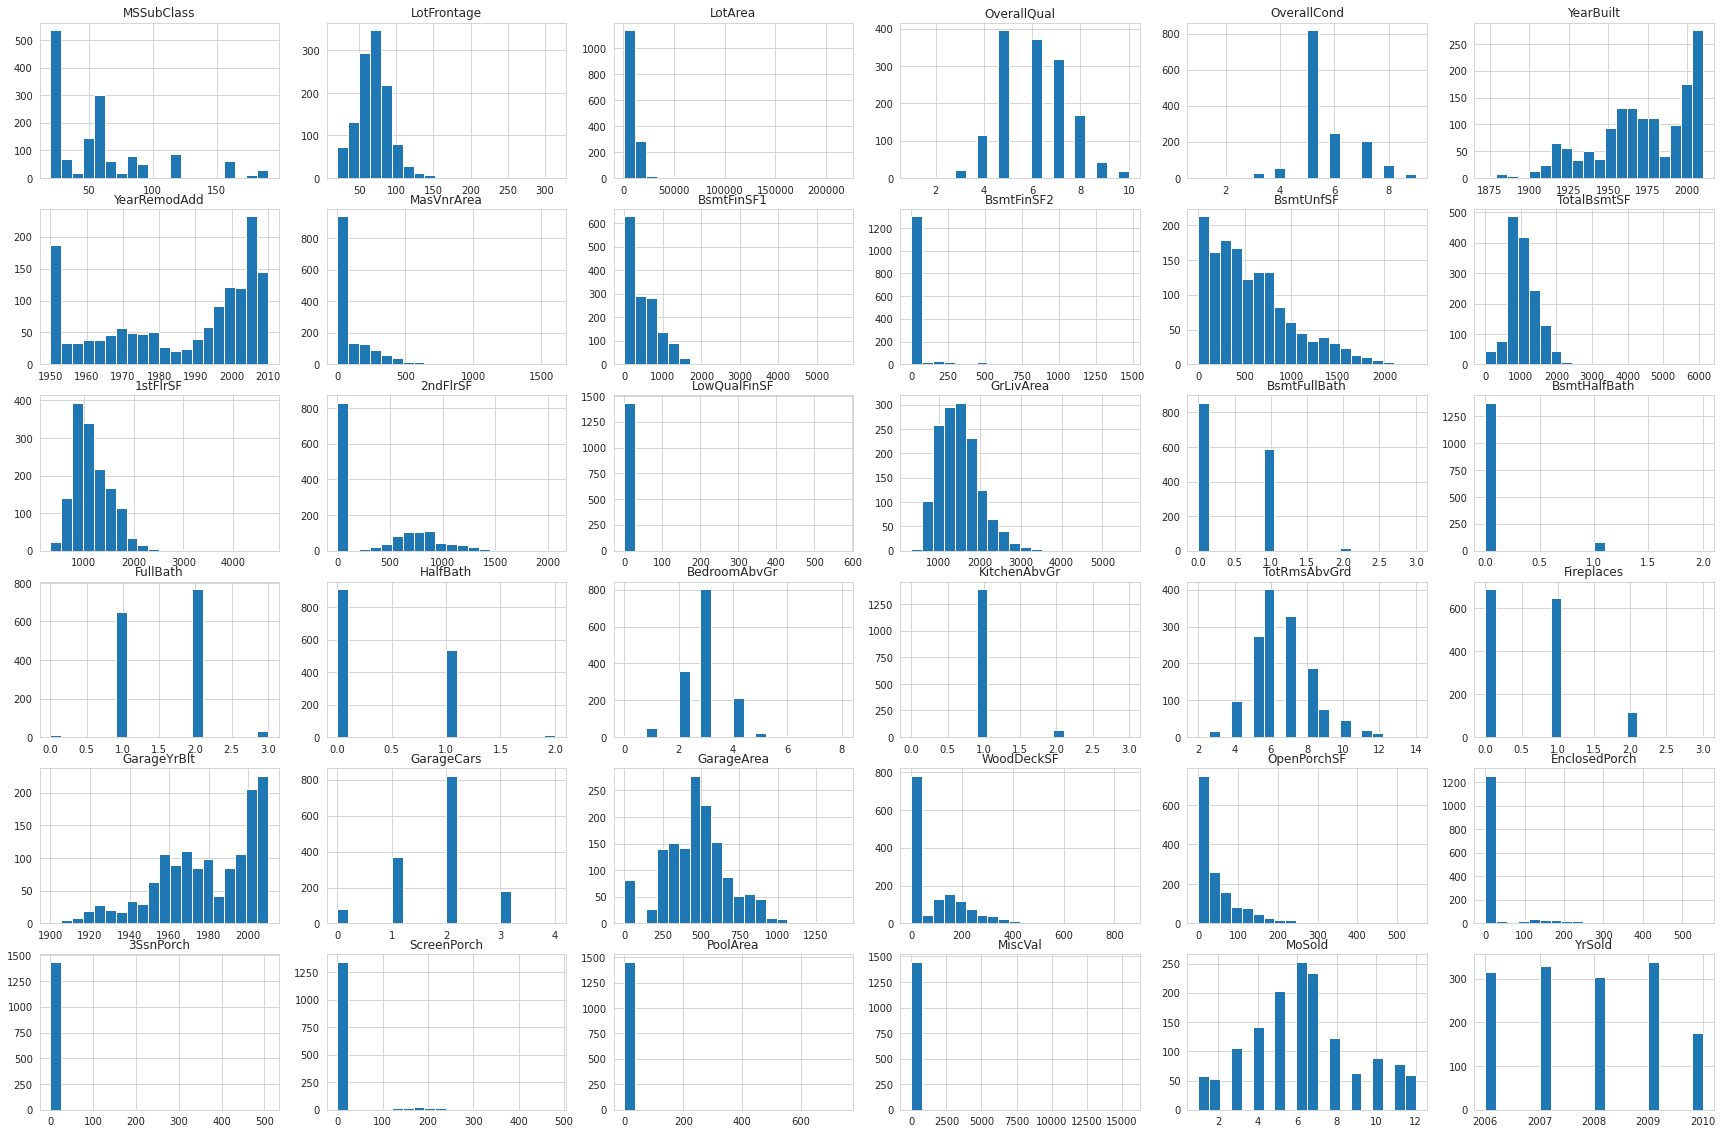

In [62]:
fig, ax = plt.subplots(6, 6, figsize=(30,20))
for i, name in enumerate(df_num.columns[:36]):
    ax[i // 6, i % 6].hist(df_num[name], bins=20)
    ax[i // 6, i % 6].set_title(name)


(array([ 49., 331., 491., 280., 151.,  77.,  34.,  25.,  11.,   3.,   3.,
          1.,   2.,   0.,   2.]),
 array([ 34900.        ,  82906.66666667, 130913.33333333, 178920.        ,
        226926.66666667, 274933.33333333, 322940.        , 370946.66666667,
        418953.33333333, 466960.        , 514966.66666667, 562973.33333333,
        610980.        , 658986.66666667, 706993.33333333, 755000.        ]),
 <BarContainer object of 15 artists>)

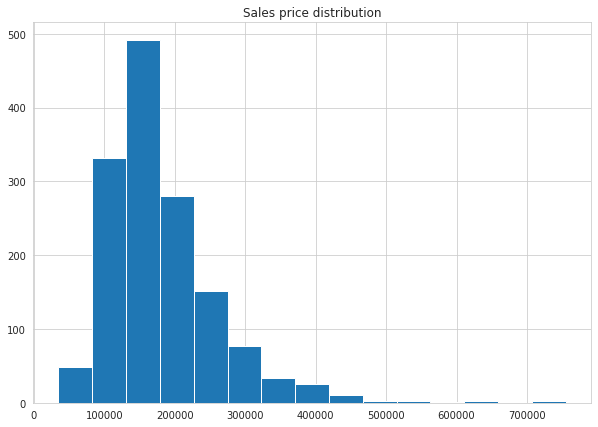

In [63]:
plt.figure(figsize=(10, 7))
plt.title('Sales price distribution')
plt.hist(data_train['SalePrice'], bins=15)

# 2. Encoding of all categorial data

Before proceed to encoding it's necessary to get rid of all NaN data

In [64]:
nan_columns = df_cat.columns[df_cat.isna().any()].tolist()
nan_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [65]:
df_cat['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [66]:
def encode(data, df_cat, nan_columns):
    for column in df_cat.columns:
        headers_of_encoding = df_cat[column].value_counts().index.to_numpy()
        if column in nan_columns:
            array = np.linspace(0, 1, headers_of_encoding.shape[0] + 1)
            for i, code in enumerate(array[1:]):
                data.loc[data[column] == headers_of_encoding[i], column] = code
        else:
            array = np.linspace(0, 1, headers_of_encoding.shape[0])
            for i, code in enumerate(array):
                data.loc[data[column] == headers_of_encoding[i], column] = code
                
encode(data_train, df_cat, nan_columns)

In [67]:
data_train = data_train.fillna(0).astype(float)

In [68]:
data_train['MSSubClass']

0       60.0
1       20.0
2       60.0
3       70.0
4       60.0
        ... 
1455    60.0
1456    20.0
1457    70.0
1458    20.0
1459    20.0
Name: MSSubClass, Length: 1460, dtype: float64

In [69]:
def normalize(data_train):
    data_train['MSSubClass'] = minmax_scale(data_train['MSSubClass'].to_numpy())
    data_train['LotArea'] = minmax_scale(data_train['LotArea'].to_numpy())
    data_train['PoolArea'] = minmax_scale(data_train['PoolArea'].to_numpy())
    data_train['MiscVal'] = minmax_scale(data_train['MiscVal'].to_numpy())

normalize(data_train)

In [70]:
data_train['MSSubClass'].value_counts()

0.000000    536
0.235294    299
0.176471    144
0.588235     87
0.058824     69
0.823529     63
0.294118     60
0.352941     58
0.411765     52
1.000000     30
0.382353     20
0.323529     16
0.147059     12
0.941176     10
0.117647      4
Name: MSSubClass, dtype: int64

In [71]:
data_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.074658,57.623288,0.043080,0.004110,0.045205,0.136073,0.061872,0.000685,0.104110,...,0.003738,0.002968,0.082363,0.010788,0.002806,6.321918,2007.815753,0.029195,0.062329,180921.195890
std,0.248827,0.167097,34.664304,0.046653,0.063996,0.186075,0.194099,0.202170,0.026171,0.193362,...,0.054441,0.046901,0.195973,0.061496,0.032008,2.703626,1.328095,0.099226,0.153479,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,42.000000,0.029229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,0.176471,0.000000,63.000000,0.038227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,0.294118,0.000000,79.000000,0.048150,0.000000,0.000000,0.333333,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,1.000000,1.000000,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2010.000000,1.000000,1.000000,755000.000000


<AxesSubplot:>

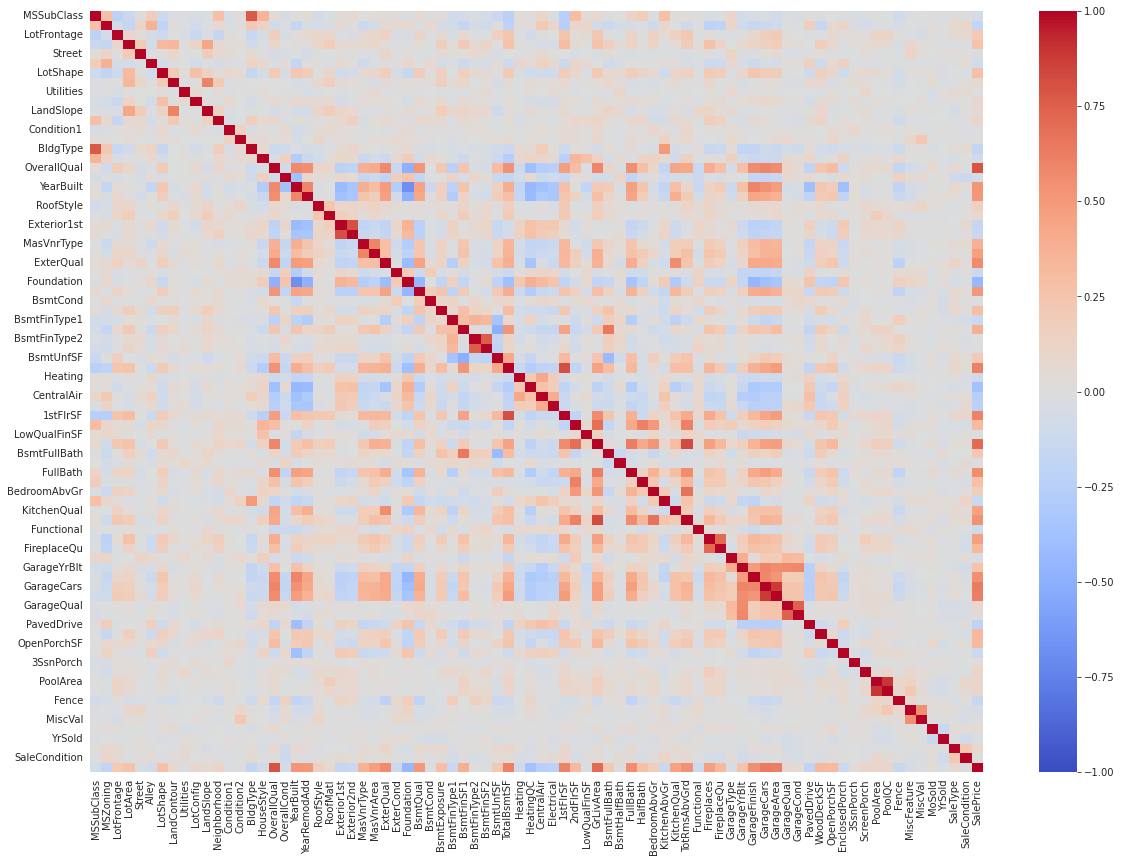

In [72]:
plt.figure(figsize=(20, 14))
sns.heatmap(data_train.corr(), cmap='coolwarm', vmin = -1, vmax = 1)

In [73]:
new_feature1 = data_train['BldgType'] * data_train['MSSubClass']

In [74]:
new_feature2 = data_train['MasVnrType'] * data_train['Exterior1st']

In [75]:
new_feature3 = data_train['PoolArea'] * data_train['Fence']

In [76]:
new_feature4 = data_train['GarageCond'] * data_train['GarageQual']

# 3. Linear vs Forest Models

In [77]:
x, y = data_train[data_train.columns[:79]], data_train[data_train.columns[-1]]
x['new corr1'] = new_feature1
x['new corr2'] = new_feature2
x['new corr3'] = new_feature3
x['new corr4'] = new_feature4

In [78]:
model = LinearRegression().fit(x, y)
y_ = model.predict(x)

In [79]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.23766188566417948

In [81]:
model_forest = RandomForestClassifier().fit(x, y)
y__ = model_forest.predict(x)

In [82]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y__)), squared=False)
rmse

0.0

# 4. Gradient Boosting Models Comparison

In [27]:
model = CatBoostRegressor()
model.fit(x, y)

Learning rate set to 0.043466
0:	learn: 77411.7649606	total: 50.9ms	remaining: 50.8s
1:	learn: 75165.8956910	total: 53.1ms	remaining: 26.5s
2:	learn: 73181.5780852	total: 54.9ms	remaining: 18.3s
3:	learn: 71069.0419676	total: 56ms	remaining: 13.9s
4:	learn: 69173.0451485	total: 57ms	remaining: 11.3s
5:	learn: 67459.1592420	total: 58ms	remaining: 9.61s
6:	learn: 65800.6428021	total: 59.2ms	remaining: 8.4s
7:	learn: 64160.7530916	total: 60.5ms	remaining: 7.5s
8:	learn: 62504.0438021	total: 61.4ms	remaining: 6.76s
9:	learn: 61139.3029356	total: 62.2ms	remaining: 6.16s
10:	learn: 59599.3449582	total: 63.1ms	remaining: 5.67s
11:	learn: 58146.0421455	total: 63.9ms	remaining: 5.26s
12:	learn: 56808.9764454	total: 65ms	remaining: 4.93s
13:	learn: 55578.2693384	total: 66.3ms	remaining: 4.67s
14:	learn: 54342.9777625	total: 67.4ms	remaining: 4.42s
15:	learn: 53253.9518049	total: 68.2ms	remaining: 4.2s
16:	learn: 52107.0843782	total: 69.1ms	remaining: 3.99s
17:	learn: 51036.5396584	total: 69.9ms	

In [28]:
y_ = model.predict(x)

In [29]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.04273075515155254

### Let's compare it to catboost model working on *not encoded* data

In [48]:
data = pd.read_csv('train.csv').drop('Id', axis=1)
data.fillna(0)
cat_features = df_cat.columns.astype(str).to_numpy()

for feature in cat_features:
    data[feature] = data[feature].astype(str)
    
x, y = data[data.columns[:79]], data[data.columns[-1]]

#test whether new features give some boost in terms of performance
x['new corr1'] = new_feature1
x['new corr2'] = new_feature2
x['new corr3'] = new_feature3
x['new corr4'] = new_feature4

In [49]:
model = CatBoostRegressor(verbose = False, cat_features=cat_features)
model.fit(x, y)

In [50]:
y_ = model.predict(x)

before
**0.06613224446467443**

with 2 features 
**0.06752921235379694**

In [51]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.06753422146276448

# 5. Fully-Connected Neural Network

In [34]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [71]:
model = torch.nn.Sequential(
    torch.nn.Linear(79, 125),
    torch.nn.ReLU(),
    torch.nn.Linear(125, 1),
).to(device)

In [72]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
loss = torch.nn.MSELoss(reduction='sum')

In [73]:
x, y = data_train[data_train.columns[:79]], data_train[data_train.columns[-1]]

In [74]:
x = torch.from_numpy(x.values).float().to(device)
y = torch.from_numpy(y.values).float().to(device)

In [75]:
n_epochs = 1500
losses = []

for n in range(n_epochs):
    
    model.zero_grad()
    y_ = model(x)
    
    loss_ = loss(torch.log(torch.abs((y))), torch.log(torch.abs(y_)))
    losses.append(loss_.cpu().detach().numpy())
    
    loss_.backward()
    optimizer.step()

/home/matthew/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1460, 1])) that is different to the input size (torch.Size([1460])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


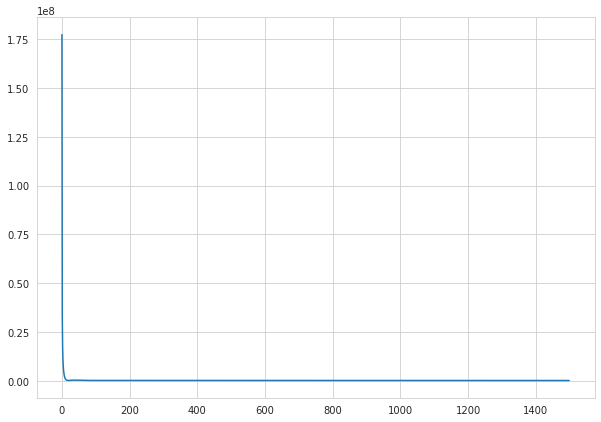

In [76]:
plt.figure(figsize=(10, 7))
plt.plot(losses)

In [77]:
with torch.no_grad():
    output = model(x).detach().cpu().numpy()

In [79]:
rmse = mean_squared_error(np.log(y.cpu().numpy()), np.log(output), squared=False)
rmse

0.39783895

# 6. Final model evaluation and results submission

In [ ]:
df_cat = data_test.select_dtypes(include = ['object'])
nan_columns = df_cat.columns[df_cat.isna().any()].tolist()

ids = data_test['Id']

data_test = data_test.drop('Id', axis=1)
encode(data_test, df_cat, nan_columns)
normalize(data_test)
data_test = data_test.fillna(0).astype(float)
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,1.0,80.0,0.184147,0.0,0.0,0.000000,0.000000,1.0,0.00,...,120.0,0.0,0.0,0.25,0.000000,0.000000,6.0,2010.0,0.111111,0.0
1,0.000000,0.2,81.0,0.232124,0.0,0.0,0.333333,0.000000,1.0,0.25,...,0.0,0.0,0.0,0.00,0.666667,0.735294,6.0,2010.0,0.111111,0.0
2,0.235294,0.2,74.0,0.224197,0.0,0.0,0.333333,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.25,0.000000,0.000000,3.0,2010.0,0.111111,0.0
3,0.235294,0.2,78.0,0.154326,0.0,0.0,0.333333,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.00,0.000000,0.000000,6.0,2010.0,0.111111,0.0
4,0.588235,0.2,43.0,0.064121,0.0,0.0,0.333333,0.333333,1.0,0.00,...,144.0,0.0,0.0,0.00,0.000000,0.000000,1.0,2010.0,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.4,21.0,0.008453,0.0,0.0,0.000000,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.00,0.000000,0.000000,6.0,2006.0,0.111111,0.0
1455,0.823529,0.4,21.0,0.007691,0.0,0.0,0.000000,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.00,0.000000,0.000000,4.0,2006.0,0.111111,0.4
1456,0.000000,0.2,160.0,0.336115,0.0,0.0,0.000000,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.00,0.000000,0.000000,9.0,2006.0,0.111111,0.4
1457,0.382353,0.2,62.0,0.162724,0.0,0.0,0.000000,0.000000,1.0,0.00,...,0.0,0.0,0.0,0.25,0.333333,0.041176,7.0,2006.0,0.111111,0.0


In [ ]:
def for_nn():
    x = torch.from_numpy(data_test.values).float().to(device)
    with torch.no_grad():
        prices = model(x).detach().cpu().numpy()
        
    data_output = pd.DataFrame({'Id' : [], 'SalePrice' : []})

    data_output['Id'] = ids
    data_output['SalePrice'] = abs(prices)

    data_output.to_csv('submissionNN.csv', index=False)

for_nn()

In [ ]:
#For catboost

ids = data_test['Id']
data_test = data_test.drop('Id', axis=1)

df_cat = data_test.select_dtypes(include = ['object'])
cat_features = df_cat.columns.astype(str).to_numpy()

for feature in cat_features:
    data_test[feature] = data_test[feature].astype(str)
    
data_test = data_test.fillna(0)
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,nan,Reg,Lvl,AllPub,Inside,...,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,nan,IR1,Lvl,AllPub,Corner,...,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,nan,IR1,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,nan,IR1,HLS,AllPub,Inside,...,144,0,nan,nan,nan,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,nan,nan,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,nan,Reg,Lvl,AllPub,Inside,...,0,0,nan,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
prices = model.predict(data_test)
data_output = pd.DataFrame({'Id' : [], 'SalePrice' : []})

data_output['Id'] = ids
data_output['SalePrice'] = abs(prices)

data_output.to_csv('submission.csv', index=False)

ideas:

+ to try to create a brand new features 
+ to compare models with OneHotEnconding to my ordinary mode
+ to add some 

### Sources of inspiration 
1. https://www.kaggle.com/code/aideesis/advanced-regression-for-house-prices
2. https://www.kaggle.com/code/anasselayady/house-prices-full-machine-learning-project
3. https://www.kaggle.com/code/allunia/house-prices-tutorial-with-catboost